# State Farm Classification Coding Exercise

## Part 3 - Training Data Set Feature Selection

### A. Import Training Data Set Pickle File and Inspect Multicollinearity Among Numerical Features

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import cleaned training data pickle file into a Pandas dataframe called train_clean1. **

In [3]:
train_clean1 = pd.read_pickle('../State_Farm/Data/train_cleaned.pickle')

** Check number of rows and columns in train_clean1 dataframe. **

In [4]:
train_clean1.shape

(40000, 127)

** View first five rows of train_clean1 dataframe. **

In [5]:
train_clean1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,June,March,May,No_Month,November,October,September,America,Europe,No_Continent
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,1,0,0,0,0,0,0,0,0,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,0,0,0,0,0,0,1,0,0,0
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,0,0,0,0,0,1,0,1,0,0
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,1,0,0,0,0,0,0,0,0,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,0,0,0,0,0,0,0,0,0,0


** Check for any missing values in train_clean1 dataframe. **

In [6]:
train_clean1.isnull().sum().sort_values(ascending=False)

No_Continent    0
x50             0
x33             0
x36             0
x37             0
x38             0
x39             0
x40             0
x42             0
x43             0
x44             0
x46             0
x47             0
x48             0
x49             0
x51             0
x31             0
x52             0
x53             0
x54             0
x55             0
x56             0
x57             0
x58             0
x59             0
x60             0
x61             0
x62             0
x63             0
x64             0
               ..
x83             0
x70             0
x71             0
x72             0
x73             0
x74             0
x75             0
x76             0
x77             0
x78             0
x79             0
x80             0
x81             0
x82             0
x84             0
x99             0
x85             0
x86             0
x87             0
x88             0
x89             0
x90             0
x91             0
x92             0
x94       

** Identify which features are numerical. **

In [7]:
train_clean1.select_dtypes(include=['float']).columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x36', 'x37', 'x38', 'x39', 'x40', 'x42', 'x43',
       'x44', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54',
       'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64',
       'x65', 'x66', 'x67', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75',
       'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85',
       'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96',
       'x97', 'x98', 'x99', 'x41_flt', 'x45_pct'],
      dtype='object')

** Extract numerical features from train_clean1 dataframe to see correlation matrix between features. **

In [8]:
num_features = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 
                'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 
                'x33', 'x36', 'x37', 'x38', 'x39', 'x40', 'x42', 'x43', 'x44', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 
                'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x69', 
                'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 
                'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x41_flt', 'x45_pct']
train_num_feat = train_clean1[num_features]

** Check the number of numerical features. **

In [9]:
train_num_feat.shape

(40000, 96)

** View correlation matrix for numerical features. **

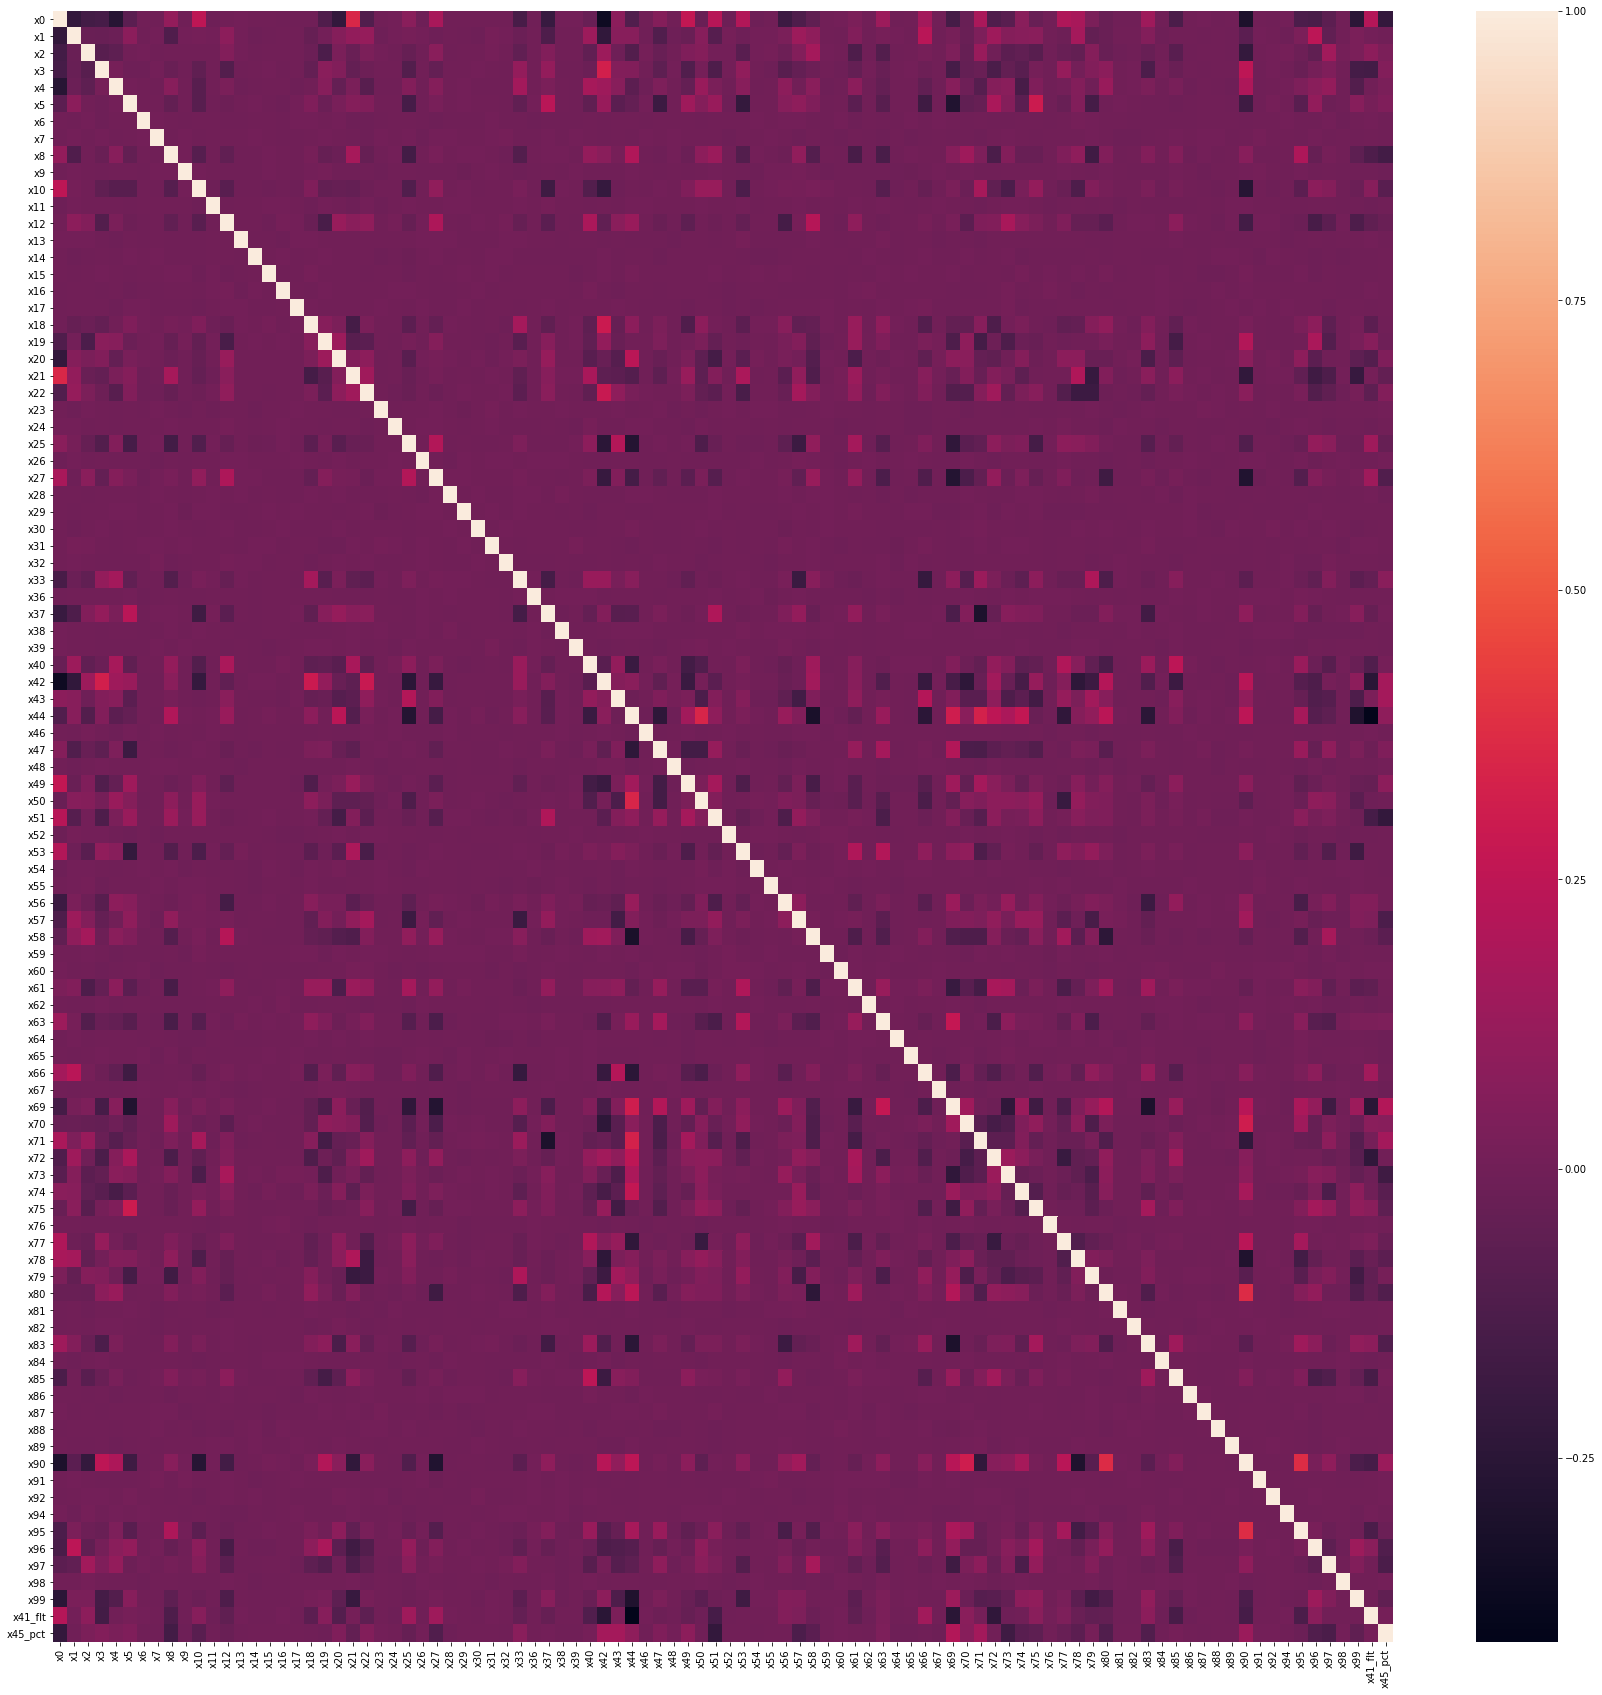

In [10]:
plt.figure(figsize=(30,30));
sns.heatmap(train_num_feat.corr(), fmt=".2f");

### B. Determine Optimal Number of Features to Include in Predictive Model

** Convert numerical feature data into numpy array and scale data. **

In [11]:
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [12]:
train_num_feat_np = train_num_feat.values
train_num_feat_np_scaled = scale(train_num_feat_np)

** Create covariance matrix for 96 numerical features. **

In [13]:
covar_matrix = PCA(n_components=96)

** Calculate variance ratios. **

In [14]:
covar_matrix.fit(train_num_feat_np_scaled)
variance = covar_matrix.explained_variance_ratio_
var = np.cumsum(np.round(variance, decimals=3)*100)
var

array([ 3.4,  6.2,  8.8, 11.2, 13.5, 15.5, 17.5, 19.4, 21.2, 23. , 24.7,
       26.3, 27.8, 29.2, 30.6, 32. , 33.3, 34.6, 35.8, 37. , 38.1, 39.2,
       40.3, 41.4, 42.5, 43.6, 44.7, 45.8, 46.9, 48. , 49.1, 50.2, 51.3,
       52.4, 53.5, 54.6, 55.7, 56.8, 57.9, 59. , 60. , 61. , 62. , 63. ,
       64. , 65. , 66. , 67. , 68. , 69. , 70. , 71. , 72. , 73. , 74. ,
       75. , 76. , 77. , 78. , 79. , 80. , 81. , 82. , 83. , 84. , 85. ,
       86. , 86.9, 87.8, 88.6, 89.4, 90.2, 91. , 91.8, 92.5, 93.2, 93.9,
       94.5, 95.1, 95.7, 96.2, 96.7, 97.2, 97.6, 98. , 98.4, 98.7, 99. ,
       99.3, 99.6, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9])

** Determine the optimum number of features to include in predictive model. **

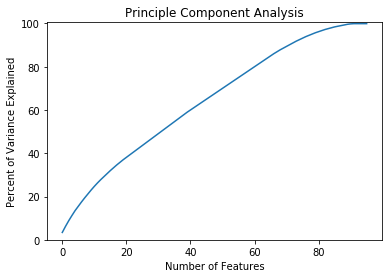

In [15]:
plt.ylabel('Percent of Variance Explained')
plt.xlabel('Number of Features')
plt.title('Principle Component Analysis')
plt.ylim(0, 100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var);

* According to the principle component analysis graph, I should include 32 features in my predictive model. While 32 features explains 50.2 percent of the variance, the model is still way too complex and runs the risk of overfitting. Therefore, I decided to include only 14 features into my model. That way, I can minimize my model's bias and variance, reduce the risk of overfitting, and maximize model parsimony.

### C. Select Features for Predictive Model

** Define X and y for feature selection. **

In [16]:
X = train_clean1.drop(['y'], axis=1)
y = train_clean1['y']

** Select features by assessing their importance using random forest classifier method. **

In [17]:
# Feature Selection: Embedded Method
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X, y)

rfc_feature_imp = pd.DataFrame(rfc_model.feature_importances_, index=X.columns, columns=['importance'])
rfc_feat_imp_14 = rfc_feature_imp.sort_values('importance', ascending=False).head(14).index
rfc_feat_imp_14

C:\Users\kyrma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Index(['x75', 'x37', 'x58', 'x97', 'x41_flt', 'x99', 'x1', 'x40', 'x70', 'x44',
       'x63', 'x56', 'x83', 'x96'],
      dtype='object')

** Plot random forest classifier method feature importances by descending order. **

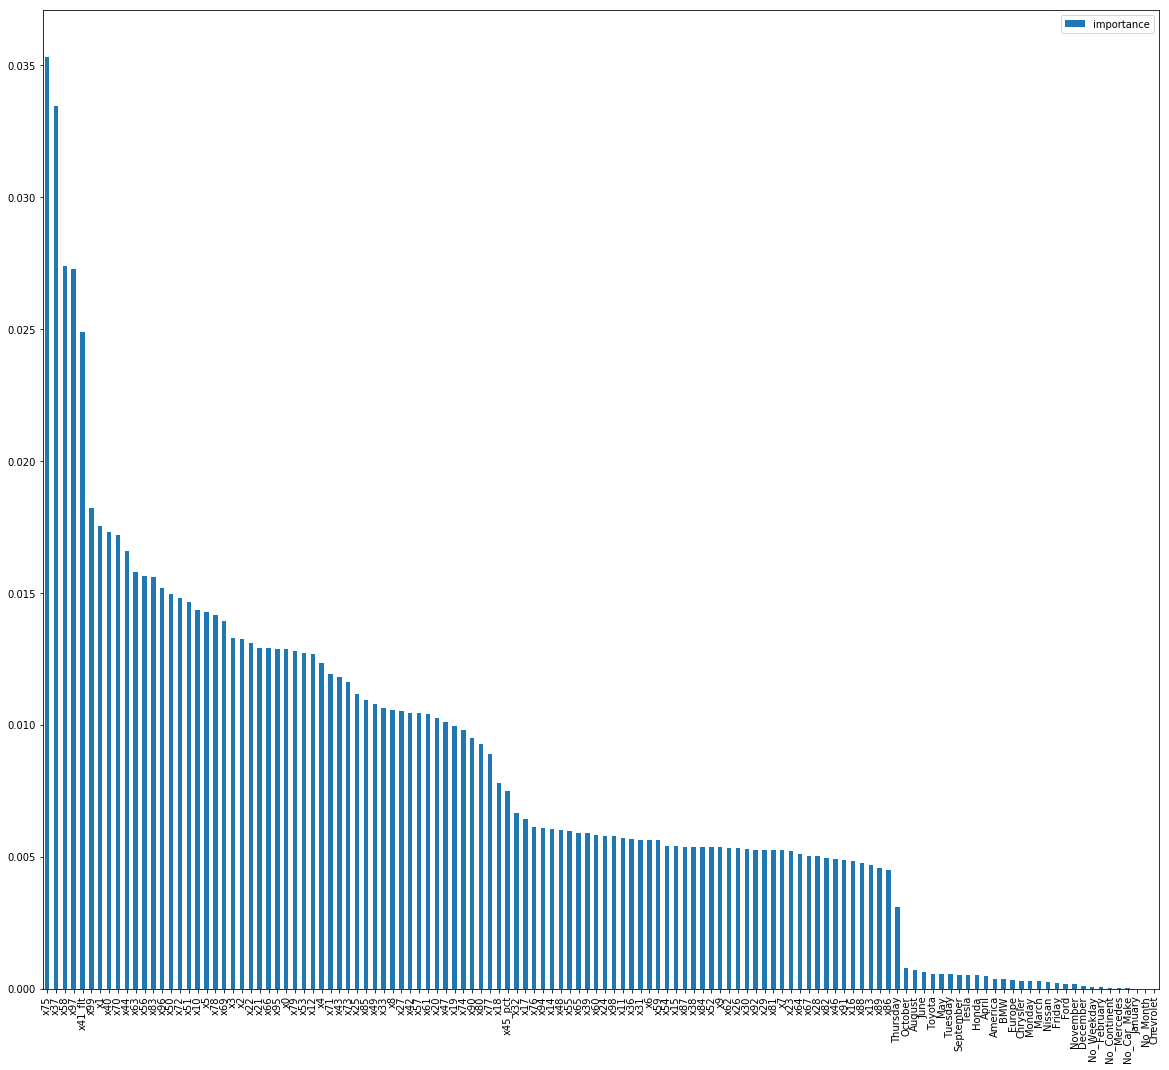

In [18]:
rfc_feature_imp.sort_values('importance', ascending=False).plot(kind='bar', figsize=(20,18));

** Select features with filter method that removes all low-variance features. **

In [19]:
# Feature Selection: Filter Method
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectKBest

# Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names.
feat_var_threshold = X.columns[vt.variances_ > threshold * (1-threshold)]

# Select the top 14.
feat_var_threshold[0:14]

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13'],
      dtype='object')

** Filter for features selected by random forest classifier method but were not selected by filter method. **

In [20]:
set(rfc_feat_imp_14) - set(feat_var_threshold)

set()

** Filter for features selected by filter method that removes all low-variance features but were not selected by random forest classifier method. **

In [21]:
set(feat_var_threshold[0:14]) - set(rfc_feat_imp_14)

{'x0',
 'x10',
 'x11',
 'x12',
 'x13',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9'}

** Select features based on univariate statistical tests. **

In [22]:
# Feature Selection: Filter Method
X_scored = SelectKBest(score_func=f_regression, k='all').fit(X, y)
feature_scoring = pd.DataFrame({'feature': X.columns, 'score': X_scored.scores_})

feat_scored_14 = feature_scoring.sort_values('score', ascending=False).head(14)['feature'].values
feat_scored_14

array(['x75', 'x37', 'x97', 'x58', 'x41_flt', 'x1', 'x70', 'x22', 'x99',
       'x78', 'x79', 'x63', 'x69', 'x21'], dtype=object)

** Select features by assessing their importance using XGBoost classifier method. **

In [23]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=500, random_state=1)
xgb_model.fit(X, y)
xgb_feature_imp = pd.DataFrame(xgb_model.feature_importances_, index=X.columns, columns=['importance'])
xgb_feat_imp_14 = xgb_feature_imp.sort_values('importance', ascending=False).head(14).index
xgb_feat_imp_14

Index(['x75', 'x41_flt', 'x37', 'x97', 'x58', 'x99', 'x66', 'x51', 'x83',
       'Thursday', 'x78', 'x53', 'x5', 'x40'],
      dtype='object')

** Plot XGBoost classifier feature importances by descending order. **

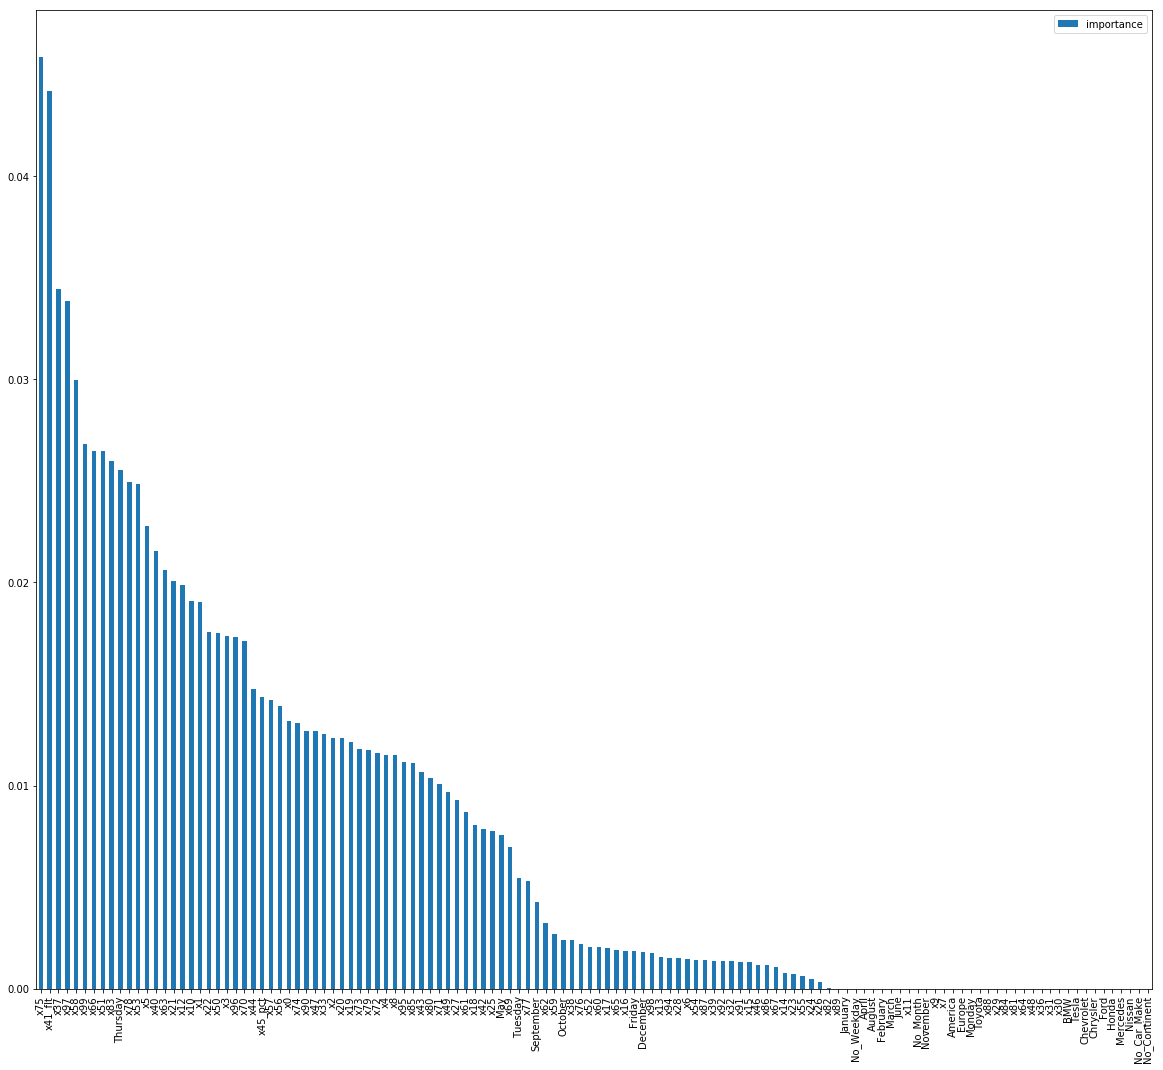

In [24]:
xgb_feature_imp.sort_values('importance', ascending=False).plot(kind='bar', figsize=(20,18));

** Gather unique features from all four feature selection methods. **

In [25]:
features = np.hstack([feat_var_threshold[0:14], rfc_feat_imp_14, feat_scored_14, xgb_feat_imp_14])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-Thursday
	-x0
	-x1
	-x10
	-x11
	-x12
	-x13
	-x2
	-x21
	-x22
	-x3
	-x37
	-x4
	-x40
	-x41_flt
	-x44
	-x5
	-x51
	-x53
	-x56
	-x58
	-x6
	-x63
	-x66
	-x69
	-x7
	-x70
	-x75
	-x78
	-x79
	-x8
	-x83
	-x9
	-x96
	-x97
	-x99


* Based off the above unique and selected features from all four feature selection methods, I have decided to include only these 14 features to build the machine learning models: x75, x37, x58, x97, x41_flt, x99, x1, x40, x70, x44, x63, x56, x83, and x96.

### D. Finalize and Export Training Modeling Data Set for Export

** Create training modeling data by selecting target and predictor features for modeling. **

In [26]:
modeling_cols = ['y', 'x75', 'x37', 'x58', 'x97', 'x41_flt', 'x99', 'x1', 'x40', 'x70', 'x44', 'x63', 'x56', 'x83', 'x96']
train_model = train_clean1[modeling_cols]

** Export training modeling data to CSV file. **

In [27]:
train_model.to_csv('../State_Farm/Data/train_model.csv', sep=',', index=False)

** Save training modeling data to pickle file for subsequent model building notebooks. **

In [28]:
train_model.to_pickle('../State_Farm/Data/train_model.pickle')

### E. Import Test Data Set Pickle File and Prepare It for Prediction by Models

** Import cleaned test data pickle file into a Pandas dataframe called test_clean1. **

In [29]:
test_clean1 = pd.read_pickle('../State_Farm/Data/test_cleaned.pickle')

** Check number of rows and columns in test_clean1 dataframe. **

In [30]:
test_clean1.shape

(10000, 125)

** View first five rows of test_clean1 dataframe. **

In [31]:
test_clean1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,June,March,May,No_Month,November,October,September,America,Europe,No_Continent
0,6.625366,54.479467,15.285444,-0.794648,22.498346,-29.212209,1.435134,-4.551934,5.930404,-3.319388,...,0,0,0,0,0,0,0,1,0,0
1,3.796927,-20.244923,-18.084196,-1.113454,-3.551728,-4.025589,1.971885,-1.965186,13.210722,-4.262240,...,1,0,0,0,0,0,0,0,0,0
2,31.875080,-61.467354,14.943580,0.979055,6.796937,-29.708041,4.778812,-2.682217,-17.122526,0.903299,...,0,0,0,0,0,0,1,0,0,0
3,15.266588,-18.454831,1.105534,-2.718771,-5.511702,2.252314,-8.017649,3.635776,-13.024884,-1.751722,...,0,0,0,0,0,0,0,0,0,0
4,-17.616761,15.810515,-17.972025,-1.995724,-23.112552,-15.899861,-17.054154,4.097427,-7.755402,-2.553410,...,0,0,0,0,0,0,0,0,0,0


** Check for any missing values in test_clean1 dataframe. **

In [32]:
test_clean1.isnull().sum().sort_values(ascending=False)

No_Continent    0
x49             0
x32             0
x33             0
x36             0
x37             0
x38             0
x39             0
x40             0
x42             0
x43             0
x44             0
x46             0
x47             0
x48             0
x50             0
x65             0
x51             0
x52             0
x53             0
x54             0
x55             0
x56             0
x57             0
x58             0
x59             0
x60             0
x61             0
x62             0
x63             0
               ..
x98             0
x97             0
x69             0
x70             0
x71             0
x72             0
x73             0
x74             0
x75             0
x76             0
x77             0
x78             0
x79             0
x80             0
x81             0
x82             0
x83             0
x84             0
x85             0
x86             0
x87             0
x88             0
x89             0
x90             0
x91       

** Create test data for model predicting by selecting predictor features for modeling. **

In [33]:
test_model = test_clean1[['x75', 'x37', 'x58', 'x97', 'x41_flt', 'x99', 'x1', 'x40', 'x70', 'x44', 'x63', 'x56', 'x83', 'x96']]

** Export test data for model predicting to CSV file. **

In [34]:
test_model.to_csv('../State_Farm/Data/test_model.csv', sep=',', index=False)

** Save test data for model predicting to pickle file for subsequent model building notebooks. **

In [35]:
test_model.to_pickle('../State_Farm/Data/test_model.pickle')